# Coordinate Transformation Using PyIRI Apex Function

PyIRI includes a built-in function for performing coordinate transformations without relying on ApexPy.
Apex coordinates were calculated at the Earth’s surface for each year from 1900 to 2025 using ApexPy.
The resulting values were then expanded into spherical harmonic coefficients up to lmax = 20 and stored in the NetCDF file PyIRI.coeff_dir / 'Apex' / 'Apex.nc'.

Text(0, 0.5, 'QD Lat (°)')

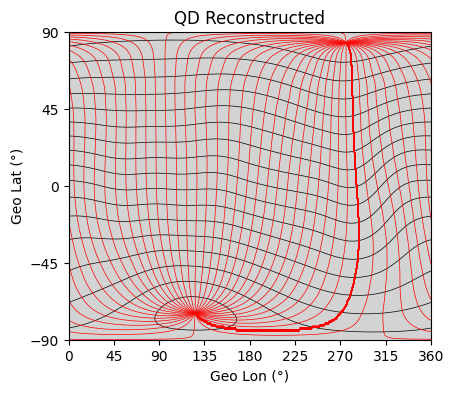

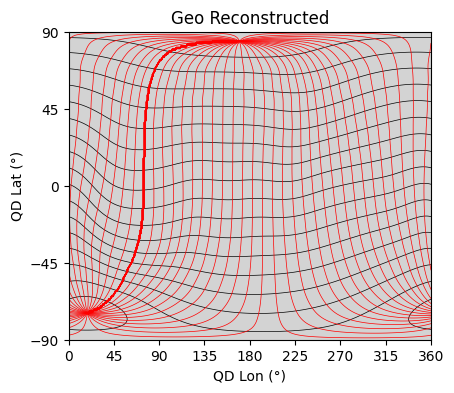

In [10]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from PyIRI.sh_library import Apex

# Define datetime object
dtime = dt.datetime(year=2020, month=1, day=1)

# Define the geo grid that you wish to be transformed to the Quasi-Dipole cooedinates
ddeg = 1
aLon = np.arange(0, 360 + ddeg, ddeg)
aLat = np.arange(90, -90 - ddeg, -ddeg)
Lon_in, Lat_in = np.meshgrid(aLon, aLat)

# Call Apex function
QDLat, QDLon = Apex(Lat_in, Lon_in, dtime, type='GEO_2_QD')


# Plot the results
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
fig.subplots_adjust(right=0.85)
ax_plot = ax
ax_plot.set_facecolor('lightgray')
ax_plot.contour(Lon_in, Lat_in, QDLat, levels=np.arange(-90, 90, 10), colors='black', linestyles='solid', linewidths=0.5)
ax_plot.contour(Lon_in, Lat_in, QDLon, levels=np.arange(0, 360, 10), colors='red', linestyles='solid', linewidths=0.5)
ax_plot.set_title('QD Reconstructed')
ax_plot.set_xlim([0, 360])
ax_plot.set_ylim([-90, 90])
ax_plot.set_xticks(np.arange(0, 360 + 45, 45))
ax_plot.set_yticks(np.arange(-90, 90 + 45, 45))
ax_plot.set_xlabel('Geo Lon (°)')
ax_plot.set_ylabel('Geo Lat (°)')

# Define the QD grid that you wish to be transformed to the Geo cooedinates
ddeg = 1
aQDLon = np.arange(0, 360 + ddeg, ddeg)
aQDLat = np.arange(90, -90 - ddeg, -ddeg)
QDLon_in, QDLat_in = np.meshgrid(aQDLon, aQDLat)

# Call Apex function
GeoLat, GeoLon = Apex(QDLat_in, QDLon_in, dtime, type='QD_2_GEO')

# Plot the results
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
fig.subplots_adjust(right=0.85)
ax_plot = ax
ax_plot.set_facecolor('lightgray')
ax_plot.contour(QDLon_in, QDLat_in, GeoLat, levels=np.arange(-90, 90, 10), colors='black', linestyles='solid', linewidths=0.5)
ax_plot.contour(QDLon_in, QDLat_in, GeoLon, levels=np.arange(0, 360, 10), colors='red', linestyles='solid', linewidths=0.5)
ax_plot.set_title('Geo Reconstructed')
ax_plot.set_xlim([0, 360])
ax_plot.set_ylim([-90, 90])
ax_plot.set_xticks(np.arange(0, 360 + 45, 45))
ax_plot.set_yticks(np.arange(-90, 90 + 45, 45))
ax_plot.set_xlabel('QD Lon (°)')
ax_plot.set_ylabel('QD Lat (°)')